In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api  as sm
from scipy import stats

In [ ]:
data=pd.read_excel("google_analytics_pq.xlsx")
data.head()

,Date,30 days,7 days,1 day,Average engagement time per active user,Engaged sessions per active user,Average engagement time per session
0,2023-06-01,94,70,26,596.00,1.654,298.000000
1,2023-06-02,120,77,46,368.13,1.239,238.507042
2,2023-06-03,123,77,21,396.67,1.381,219.210526
3,2023-06-04,129,81,23,332.00,1.652,173.545455
4,2023-06-05,130,81,15,731.33,2.267,274.250000


In [ ]:
data['Average engagement time per active user in minutes']=round(data['Average engagement time per active user']/60)
data['Average engagement time per session in minutes']=round(data['Average engagement time per session']/60)

,Date,30 days,7 days,1 day,Average engagement time per active user,Engaged sessions per active user,Average engagement time per session,Average engagement time per active user in minutes,Average engagement time per session in minutes
0,2023-06-01,94,70,26,596.00,1.654,298.000000,10.0,5.0
1,2023-06-02,120,77,46,368.13,1.239,238.507042,6.0,4.0
2,2023-06-03,123,77,21,396.67,1.381,219.210526,7.0,4.0
3,2023-06-04,129,81,23,332.00,1.652,173.545455,6.0,3.0
4,2023-06-05,130,81,15,731.33,2.267,274.250000,12.0,5.0


In [ ]:
data.describe()

,Date,30 days,7 days,1 day,Average engagement time per active user,Engaged sessions per active user,Average engagement time per session,Average engagement time per active user in minutes,Average engagement time per session in minutes
count,503,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2024-02-07 00:00:00,921.526839,286.437376,60.037773,660.559026,1.248612,382.206477,11.000000,6.363817
min,2023-06-01 00:00:00,94.000000,66.000000,11.000000,82.890000,0.706000,36.032258,1.000000,1.000000
25%,2023-10-04 12:00:00,364.000000,112.000000,24.000000,330.255000,1.113500,188.129105,5.500000,3.000000
50%,2024-02-07 00:00:00,608.000000,192.000000,41.000000,531.530000,1.232000,303.385246,9.000000,5.000000
75%,2024-06-11 12:00:00,1461.000000,414.500000,81.000000,855.970000,1.351000,526.174861,14.000000,9.000000
max,2024-10-15 00:00:00,2517.000000,1131.000000,505.000000,3987.290000,2.370000,2203.500000,66.000000,37.000000
std,NaN,672.708238,230.788678,53.183069,515.127753,0.209611,278.905249,8.591898,4.651698


#### An engaged session is a session that lasts longer than 10 seconds, has a key events, or has at least 2 pageviews or screenviews.

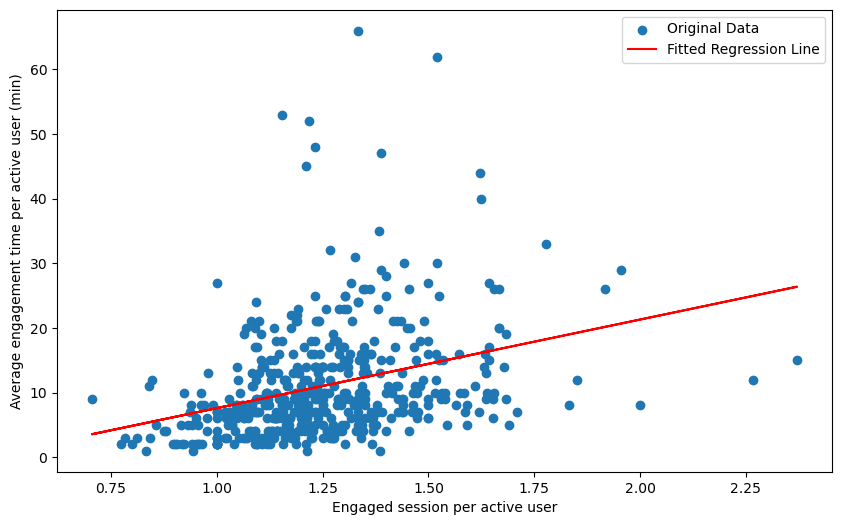

In [ ]:
# Define variables for regression
X = sm.add_constant(data['Engaged sessions per active user'])
y =data['Average engagement time per active user in minutes']


#Fit the linear regression model
model = sm.OLS(y,X).fit()

#Add new column with values to dataframe for Model 1

data['Fitted Values M1'] = model.predict(X)

#Display the graph using Matplotlib
#Scatter plot with fitted regression line and original data points

plt.figure(figsize=(10,6))

#scatter plot with data
plt.scatter(data['Engaged sessions per active user'],data['Average engagement time per active user in minutes'], label = 'Original Data')

#plot the fitted values or fitted regression line on the same graph

plt.plot(data['Engaged sessions per active user'], data['Fitted Values M1'], color='red',label='Fitted Regression Line')

#label axes
plt.xlabel('Engaged session per active user')
plt.ylabel('Average engagement time per active user (min)')

#Show the legend
plt.legend()
#Show the graph
plt.show()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Average engagement time per active user in minutes   R-squared:                       0.112
Model:                                                            OLS   Adj. R-squared:                  0.110
Method:                                                 Least Squares   F-statistic:                     63.13
Date:                                                Sun, 20 Oct 2024   Prob (F-statistic):           1.29e-14
Time:                                                        04:50:36   Log-Likelihood:                -1765.2
No. Observations:                                                 503   AIC:                             3534.
Df Residuals:                                                     501   BIC:                             3543.
Df Model:                                                           1                                         
Covariance Type:                                            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -6.1208      2.185     -2.801      0.005     -10.414      -1.828
Engaged sessions per active user    13.7119      1.726      7.945      0.000      10.321      17.103
==============================================================================
Omnibus:                      292.850   Durbin-Watson:                   0.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2566.829
Skew:                           2.437   Prob(JB):                         0.00
Kurtosis:                      12.936   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data_books=pd.read_csv("books_and_genres.csv")
data_books.head()

,Title and Author,Book Title,Book Genre,Book Tags,Book Summary,Book Mature,Book Status,Cover Licensing,temporary cover,Follow up Cover,...,Username available,Public name manual,Author Bio Manual,Cover Picture,Language,Other Language,Follow Up,Canva Promo,Book Trope,Tiktok Genre video
0,The Other Side - No thanks,The Other Side,"Romance,Paranormal","romance,vampire,paranormal,strongfemalelead",Mary can see beings from the other side where ...,Yes,Completed,NaN,NaN,NaN,...,Yes,NaN,NaN,NaN,English,NaN,NaN,NaN,flash marriage,NaN
1,Caraval -,Caraval,Fantasy,"Strongfemale,fantasy",I didn't read it,No,Completed,NaN,NaN,NaN,...,No,Bibliophile,NaN,NaN,English,NaN,NaN,NaN,Fun games,NaN
2,"In Black And White, I'm Blue - Sayu","In Black And White, I'm Blue","Romance,LGTBQ+,Drama,Short story,Thriller","romance,bl,music,contemporaryart,pianist,dancer","""Outside, in the harsh light of day, the lines...",Yes,Completed,Licensed,NaN,NaN,...,No,Sayu,NaN,NaN,English,NaN,NaN,"""Share your WeInk book! In Black And White, I'...","dancer,pianist,mafia,boy × boy,forbidden roman...",NaN
3,Tribrid Nexus - Alandra Hensley,Tribrid Nexus,"Romance,Fantasy","romantasy,fantasy,dragonshifters,fatedmates,spice","In ""Tribrid Nexus,"" the heart-pounding third b...",Yes,Completed,Licensed,NaN,NaN,...,Yes,NaN,NaN,Tribrid Nexus Ebook_11zon_11zon.jpg (https://v...,English,NaN,NaN,Share your WeInk book! Tribrid Nexus.zip (http...,"enemies to lovers, touch her you die, morally ...",NaN
4,Flight Games - Alandra Hensley,Flight Games,"Fantasy,Romance","romantasy,fantasy,dragonshifters,fatedmates,spice","In the heart of the 12th Annual Flight Games, ...",Yes,Completed,Licensed,NaN,NaN,...,Yes,NaN,NaN,Bria Lexor ebook_11zon_11zon.jpg (https://v5.a...,English,NaN,NaN,Share your WeInk book! Flight Games.zip (https...,"enemies to lovers, touch her you die, morally ...",NaN


In [ ]:

Languages = data_books["Language"].unique()
Languages = ['English', 'Filipino', 'French', 'Indian', 'German', 'Other', 'Indonesian']

counts=[]
title_author=[]
name_languages=[]
for language in Languages:
    Books = data_books[data_books["Language"]==language]
    name_languages.append(language)
    title_author.append(Books["Title and Author"])
    Count= Books['Book Title'].size
    counts.append(Count)
        #print(Books[['Title and Author','Book Genre','Language']])
#print(counts)
#print(title_author)
#print(name_languages)

#Create a dataframe to export
# create a sample DataFrame
titles_and_authors = pd.DataFrame({'Titles and Authors': title_author,
        'Language': name_languages})
Language_Counts = pd.DataFrame({'Language': name_languages,
        'Count': counts})

print(Language_Counts)
print(titles_and_authors,"/t")
#Language_Counts.to_csv('Language_Counts.csv', index=False)

     Language  Count
0     English    819
1    Filipino     12
2      French      2
3      Indian      2
4      German      1
5       Other      1
6  Indonesian      1
                                  Titles and Authors    Language
0  0                              The Other Side ...     English
1  574                           Umaasa - leiv
57...    Filipino
2  602                          Assassin - Lu-na
...      French
3  804                      INAYAAT - Aster
806  ...      Indian
4  825    Die playlists  - Zara
Name: Title and A...      German
5  833    Run or Die - Yraaaaa01 
Name: Title and...       Other
6  873    The Eyes - sugar
Name: Title and Author...  Indonesian /t


In [ ]:
book_genre=data_books["Book Genre"].dropna()
book_genre.info

<bound method Series.info of 0                              Romance,Paranormal
1                                         Fantasy
2       Romance,LGTBQ+,Drama,Short story,Thriller
3                                 Romance,Fantasy
4                                 Fantasy,Romance
                          ...                    
1236                                      Romance
1237                              Romance,Fantasy
1238                                      Romance
1239                                      Romance
1240                                      Romance
Name: Book Genre, Length: 1238, dtype: object>

In [ ]:
book_genre.mode()

0    Romance
Name: Book Genre, dtype: object

In [ ]:
book_genre

0                              Romance,Paranormal
1                                         Fantasy
2       Romance,LGTBQ+,Drama,Short story,Thriller
3                                 Romance,Fantasy
4                                 Fantasy,Romance
                          ...                    
1236                                      Romance
1237                              Romance,Fantasy
1238                                      Romance
1239                                      Romance
1240                                      Romance
Name: Book Genre, Length: 1238, dtype: object

In [ ]:
#Loop to Iterate and change data frame during each iteration
genres=book_genre
modes=[]
counts=[]
for i in range(18):
    #find the mode in string
    current_mode=genres[genres!=''].mode()[0]
    #add this mode to an empty list
    modes.append(current_mode)
    #count the number of instances of this mode in column called 'genres'
    count=genres[genres.str.contains(current_mode)].count()
    counts.append(count)
    genres=genres.replace(current_mode,'',regex=True)

    #Clean Up
    #Clean up: remove extra commas or empty strings left behind after replacing
    genres =genres.str.replace(r',+', ',', regex=True)  # Replace multiple commas with a single comma
    genres = genres.str.strip('+')  # Remove leading or trailing commas

    genres = genres.str.strip(',')  # Remove leading or trailing commas
    genres = genres.str.strip()  # Remove whitespace

#Change LGTBQ to LGTBQ+

# Word to search for
word_to_search = 'LGTBQ'
# Word to replace with
replacement_word = 'LGTBQ+'

# Iterate over the list and replace the word
for i in range(len(modes)):
    if word_to_search in modes[i]:
        # Replace the word
        modes[i] = modes[i].replace(word_to_search, replacement_word)


#Create a dataframe to export
# create a sample DataFrame
data_genre = {'Book Genre': modes,
        'Instances': counts}
genres_count = pd.DataFrame(data_genre)
genres_count.to_csv('genres_count.csv', index=False)